In [1]:
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
df = pd.read_csv("Comcast_telecom_complaints_data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,August,4


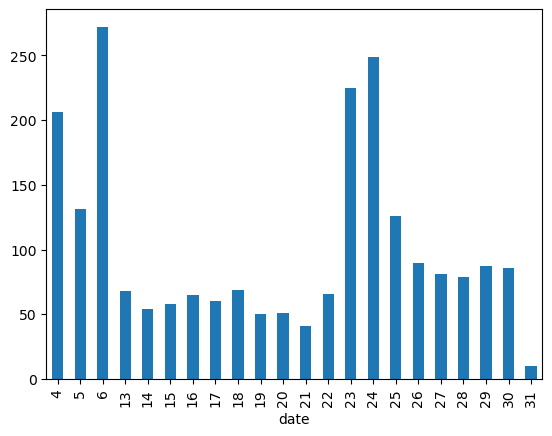

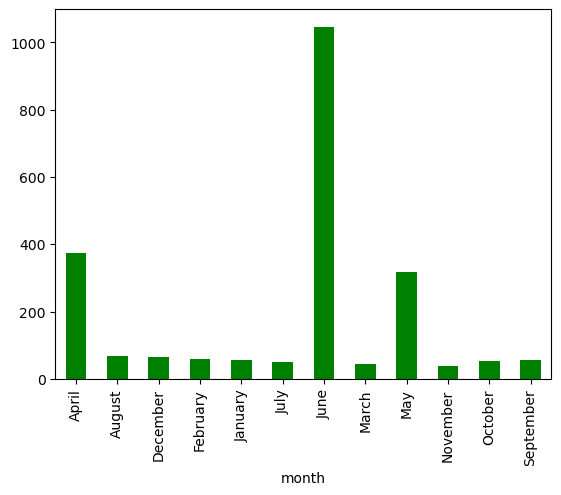

In [4]:
df["month"]=pd.to_datetime(df["Date_month_year"]).dt.month_name()
df["date"]=pd.to_datetime(df["Date_month_year"]).dt.day

display(df.head(2))

df.groupby(["date"])["Customer Complaint"].count().plot(kind ="bar")
plt.show()

df.groupby(["month"])["Customer Complaint"].count().plot(kind="bar",color="green")
plt.show()

In [6]:
df["Customer Complaint"].str.lower().value_counts().to_frame().reset_index()

,index,Customer Complaint
0,comcast,102
1,comcast data cap,30
2,comcast internet,29
3,comcast data caps,21
4,comcast billing,18
...,...,...
1735,monthly data caps,1
1736,"comcast/xfinity poor service, fraudulent billi...",1
1737,lost emails/billing,1
1738,improper billing and non resolution of issues,1


In [8]:
df["Customer Complaint"].str.lower().value_counts().head()

comcast              102
comcast data cap      30
comcast internet      29
comcast data caps     21
comcast billing       18
Name: Customer Complaint, dtype: int64

In [9]:
df.Status.value_counts()

Solved     973
Closed     734
Open       363
Pending    154
Name: Status, dtype: int64

In [11]:
df["Status"]=df["Status"].apply(lambda x : "open" if ((x=="open") | (x=="pending")) else "closed")

In [12]:
df.Status.value_counts()

closed    2224
Name: Status, dtype: int64

In [13]:
'''
values=[]
for i in df["status"] :

if ((i=="open")or(i=="pending")):
values.append("closed")

else:
values.append("closed")
df["status"]=values

'''

'\nvalues=[]\nfor i in df["status"] :\n\nif ((i=="open")or(i=="pending")):\nvalues.append("closed")\n\nelse:\nvalues.append("closed")\ndf["status"]=values\n\n'

In [14]:
df.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,closed,No,August,4


'Open'

,State,Status


'closed'

,State,Status


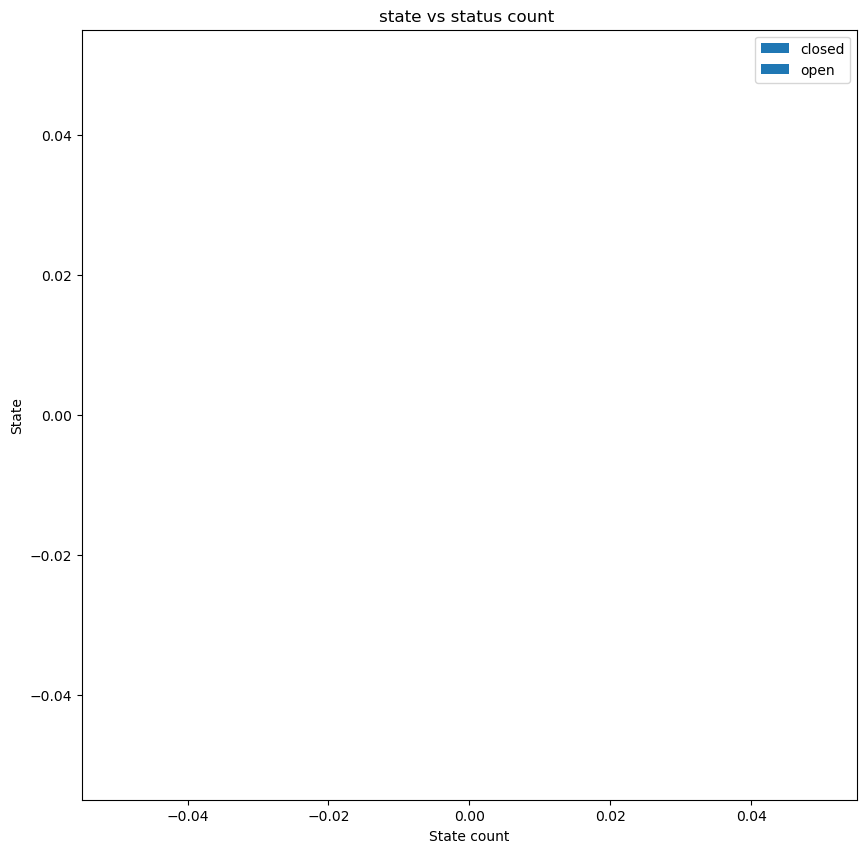

In [16]:
op=df[df['Status']=="Open"].groupby(["State"])['Status'].count().to_frame().reset_index()
cl=df[df['Status']=="Closed"].groupby(["State"])['Status'].count().to_frame().reset_index()

display('Open', op.head(2))
display('closed' , cl.head(2))

fig = plt.figure(figsize=(10,10))

plt.barh(cl.State , cl.Status)
plt.barh(op.State , op.Status)

plt.ylabel("State" , size=10)
plt.xlabel("State count")
plt.legend(["closed","open"])
plt.title("state vs status count ")
plt.show()
